In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import *
from sklearn.model_selection import *
from sklearn.neighbors import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.naive_bayes import *
from sklearn.discriminant_analysis import *
from sklearn.metrics import *

In [2]:
df = pd.read_csv("insurance_dataset.csv")
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,46048,Male,22,1,26.0,1,< 1 Year,No,27460.0,152.0,172,0
1,228395,Male,29,1,15.0,0,< 1 Year,Yes,28982.0,152.0,207,0
2,170449,Male,25,1,2.0,0,< 1 Year,No,25067.0,152.0,228,0
3,92900,Male,34,1,47.0,1,1-2 Year,Yes,2630.0,156.0,193,0
4,257877,Male,35,1,28.0,0,1-2 Year,Yes,40499.0,124.0,77,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,193914,Female,23,1,43.0,1,< 1 Year,No,34493.0,152.0,156,0
49996,251014,Male,25,1,45.0,0,< 1 Year,Yes,23626.0,152.0,250,1
49997,176901,Female,35,1,13.0,0,1-2 Year,Yes,30072.0,156.0,256,0
49998,375871,Male,52,1,14.0,0,1-2 Year,Yes,23863.0,26.0,201,0


In [3]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [4]:
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [5]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,190360.481080,38.917040,0.998140,26.403980,0.456260,30651.202720,111.74360,154.520040,0.122780
std,110129.705102,15.547106,0.043088,13.228193,0.498088,16856.326189,54.29231,83.665823,0.328188
min,3.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.00000,10.000000,0.000000
25%,94695.500000,25.000000,1.000000,15.000000,0.000000,24555.000000,26.00000,82.000000,0.000000
50%,190046.000000,36.000000,1.000000,28.000000,0.000000,31748.000000,125.00000,155.000000,0.000000
75%,285516.250000,50.000000,1.000000,35.000000,1.000000,39476.000000,152.00000,227.000000,0.000000
max,381105.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.00000,299.000000,1.000000


In [6]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,46048,Male,22,1,26.0,1,< 1 Year,No,27460.0,152.0,172,0
1,228395,Male,29,1,15.0,0,< 1 Year,Yes,28982.0,152.0,207,0
2,170449,Male,25,1,2.0,0,< 1 Year,No,25067.0,152.0,228,0
3,92900,Male,34,1,47.0,1,1-2 Year,Yes,2630.0,156.0,193,0
4,257877,Male,35,1,28.0,0,1-2 Year,Yes,40499.0,124.0,77,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,193914,Female,23,1,43.0,1,< 1 Year,No,34493.0,152.0,156,0
49996,251014,Male,25,1,45.0,0,< 1 Year,Yes,23626.0,152.0,250,1
49997,176901,Female,35,1,13.0,0,1-2 Year,Yes,30072.0,156.0,256,0
49998,375871,Male,52,1,14.0,0,1-2 Year,Yes,23863.0,26.0,201,0


In [7]:
(df["Response"].value_counts() * 100 / len(df)).round(0)

Response
0    88.0
1    12.0
Name: count, dtype: float64

1) check_duplicates<br><br>
2) drop_duplicates<br><br>
3) drop_unnecessary_columns<br><br>
4) encoding<br><br>
5) check_datatypes<br><br>

In [9]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,46048,Male,22,1,26.0,1,< 1 Year,No,27460.0,152.0,172,0
1,228395,Male,29,1,15.0,0,< 1 Year,Yes,28982.0,152.0,207,0
2,170449,Male,25,1,2.0,0,< 1 Year,No,25067.0,152.0,228,0
3,92900,Male,34,1,47.0,1,1-2 Year,Yes,2630.0,156.0,193,0
4,257877,Male,35,1,28.0,0,1-2 Year,Yes,40499.0,124.0,77,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,193914,Female,23,1,43.0,1,< 1 Year,No,34493.0,152.0,156,0
49996,251014,Male,25,1,45.0,0,< 1 Year,Yes,23626.0,152.0,250,1
49997,176901,Female,35,1,13.0,0,1-2 Year,Yes,30072.0,156.0,256,0
49998,375871,Male,52,1,14.0,0,1-2 Year,Yes,23863.0,26.0,201,0


In [13]:
df.duplicated().sum()

4

In [15]:
df_1 = df.drop_duplicates(ignore_index=True,keep="first").reset_index(drop=True)
df_1

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,46048,Male,22,1,26.0,1,< 1 Year,No,27460.0,152.0,172,0
1,228395,Male,29,1,15.0,0,< 1 Year,Yes,28982.0,152.0,207,0
2,170449,Male,25,1,2.0,0,< 1 Year,No,25067.0,152.0,228,0
3,92900,Male,34,1,47.0,1,1-2 Year,Yes,2630.0,156.0,193,0
4,257877,Male,35,1,28.0,0,1-2 Year,Yes,40499.0,124.0,77,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49991,193914,Female,23,1,43.0,1,< 1 Year,No,34493.0,152.0,156,0
49992,251014,Male,25,1,45.0,0,< 1 Year,Yes,23626.0,152.0,250,1
49993,176901,Female,35,1,13.0,0,1-2 Year,Yes,30072.0,156.0,256,0
49994,375871,Male,52,1,14.0,0,1-2 Year,Yes,23863.0,26.0,201,0


In [16]:
df_2 = df_1.drop(columns="id")
df_2

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,22,1,26.0,1,< 1 Year,No,27460.0,152.0,172,0
1,Male,29,1,15.0,0,< 1 Year,Yes,28982.0,152.0,207,0
2,Male,25,1,2.0,0,< 1 Year,No,25067.0,152.0,228,0
3,Male,34,1,47.0,1,1-2 Year,Yes,2630.0,156.0,193,0
4,Male,35,1,28.0,0,1-2 Year,Yes,40499.0,124.0,77,1
...,...,...,...,...,...,...,...,...,...,...,...
49991,Female,23,1,43.0,1,< 1 Year,No,34493.0,152.0,156,0
49992,Male,25,1,45.0,0,< 1 Year,Yes,23626.0,152.0,250,1
49993,Female,35,1,13.0,0,1-2 Year,Yes,30072.0,156.0,256,0
49994,Male,52,1,14.0,0,1-2 Year,Yes,23863.0,26.0,201,0


In [29]:
gender_dict = {}
ctr = 0
for i in np.sort(df_2["Gender"].unique()):
    gender_dict[i] = ctr
    ctr += 1
gender_dict

{'Female': 0, 'Male': 1}

In [42]:
vehicle_age_list = []
ctr = 0
for i in np.sort(df_2["Vehicle_Age"].unique()):
    vehicle_age_list.append(ctr)
    ctr += 1
p = 0
for i in range(len(vehicle_age_list)-1):
    vehicle_age_list[p] = 1 - vehicle_age_list[p]
    p += 1

p = 0
vehicle_age_dict = {}
for i in np.sort(df_2["Vehicle_Age"].unique()):
    vehicle_age_dict[i] = vehicle_age_list[p]
    p += 1
vehicle_age_dict

{'1-2 Year': 1, '< 1 Year': 0, '> 2 Years': 2}

In [45]:
vehicle_damage_dict = {}
ctr = 0
for i in np.sort(df_2["Vehicle_Damage"].unique()):
    vehicle_damage_dict[i] = ctr
    ctr += 1
vehicle_damage_dict

{'No': 0, 'Yes': 1}

In [46]:
df_3 = df_2.copy()
df_3["Gender"] = df_3["Gender"].map(gender_dict)
df_3["Vehicle_Age"] = df_3["Vehicle_Age"].map(vehicle_age_dict)
df_3["Vehicle_Damage"] = df_3["Vehicle_Damage"].map(vehicle_damage_dict)
df_3

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,22,1,26.0,1,0,0,27460.0,152.0,172,0
1,1,29,1,15.0,0,0,1,28982.0,152.0,207,0
2,1,25,1,2.0,0,0,0,25067.0,152.0,228,0
3,1,34,1,47.0,1,1,1,2630.0,156.0,193,0
4,1,35,1,28.0,0,1,1,40499.0,124.0,77,1
...,...,...,...,...,...,...,...,...,...,...,...
49991,0,23,1,43.0,1,0,0,34493.0,152.0,156,0
49992,1,25,1,45.0,0,0,1,23626.0,152.0,250,1
49993,0,35,1,13.0,0,1,1,30072.0,156.0,256,0
49994,1,52,1,14.0,0,1,1,23863.0,26.0,201,0


In [47]:
df_3.dtypes

Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [49]:
df_features = df_3.drop(columns=["Response"])
df_labels = df_3["Response"]

<Axes: >

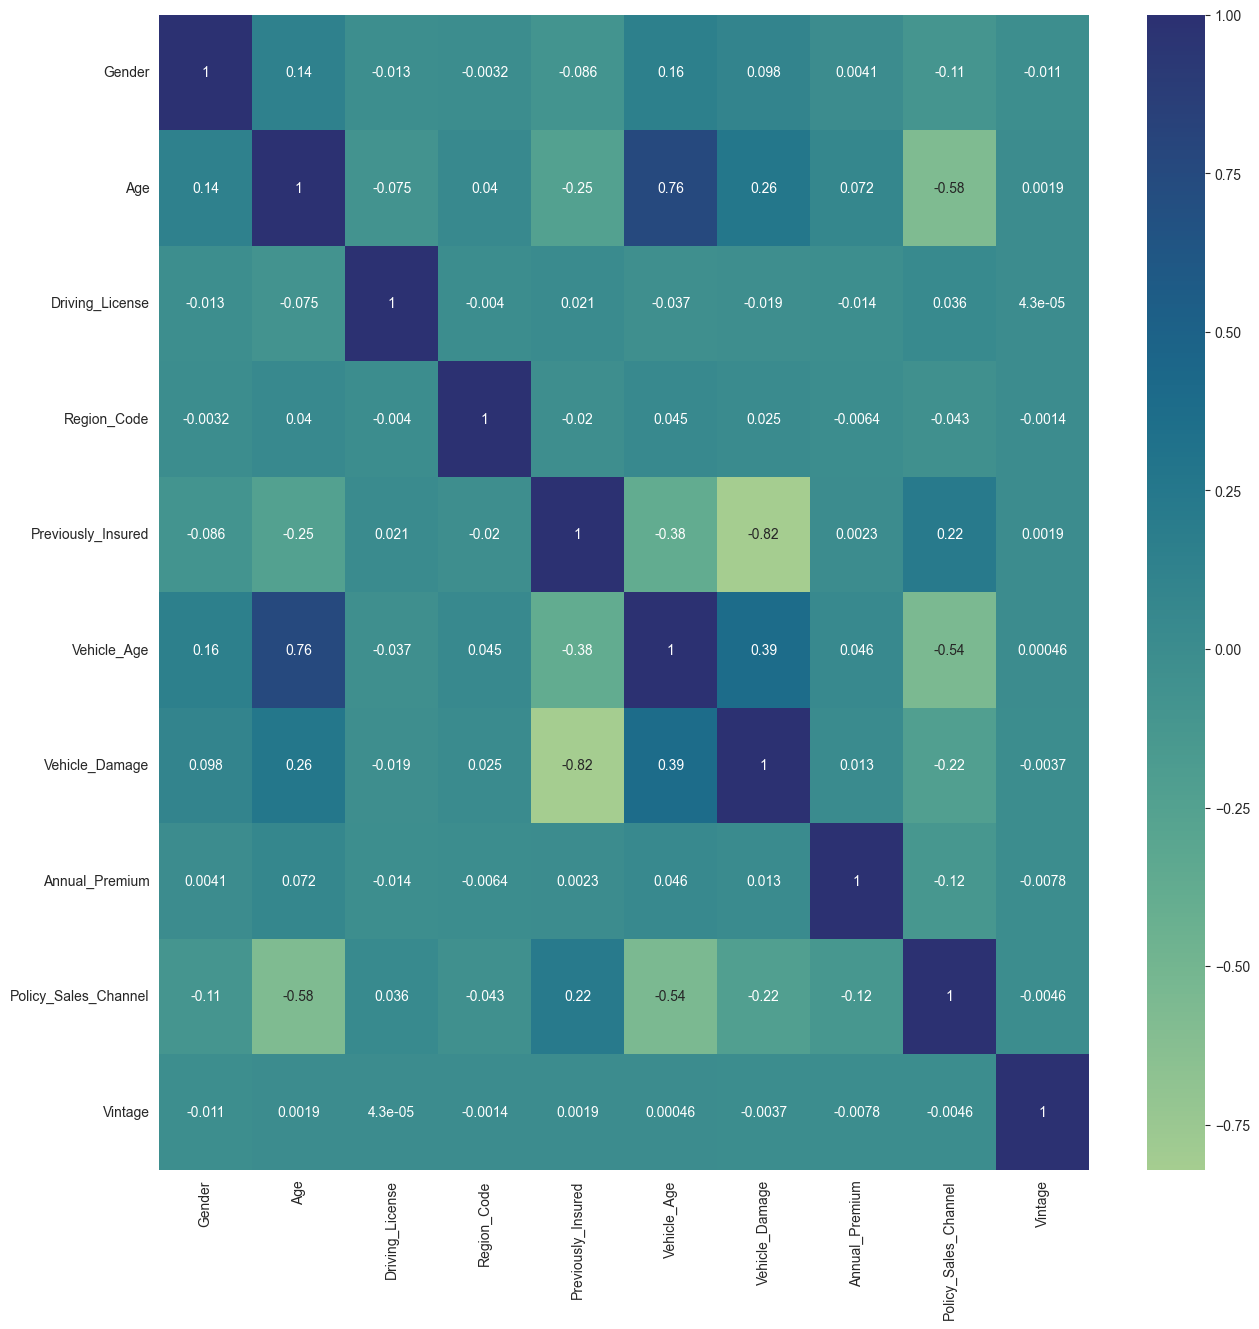

In [59]:
fig,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(ax=ax,data=df_features.corr(), annot=True,cmap="crest")

<Axes: xlabel='Response', ylabel='count'>

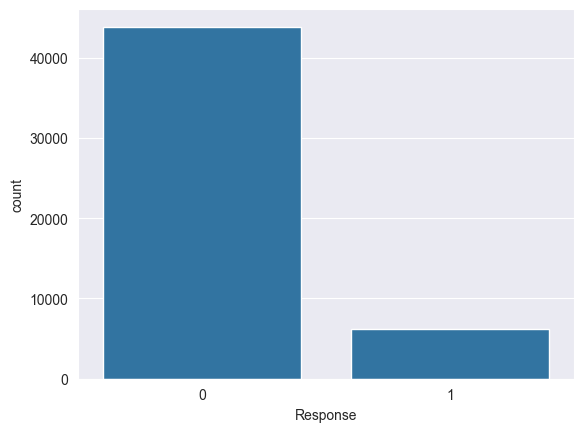

In [75]:
dl = df_labels.value_counts().reset_index()
sns.barplot(x=dl["Response"],y=dl["count"])

<Axes: xlabel='Gender', ylabel='count'>

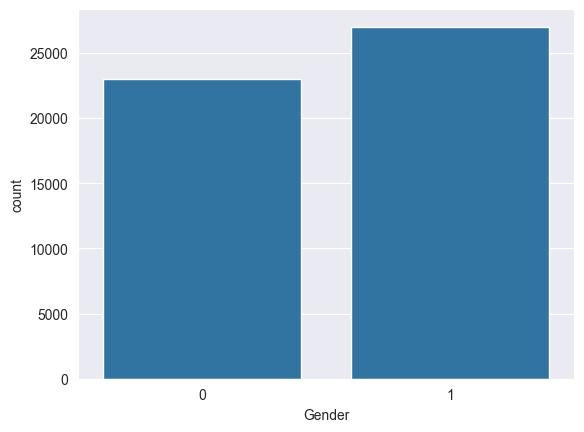

In [76]:
dl = df_features["Gender"].value_counts().reset_index()
sns.barplot(x=dl["Gender"],y=dl["count"])

<Axes: xlabel='Vehicle_Damage', ylabel='count'>

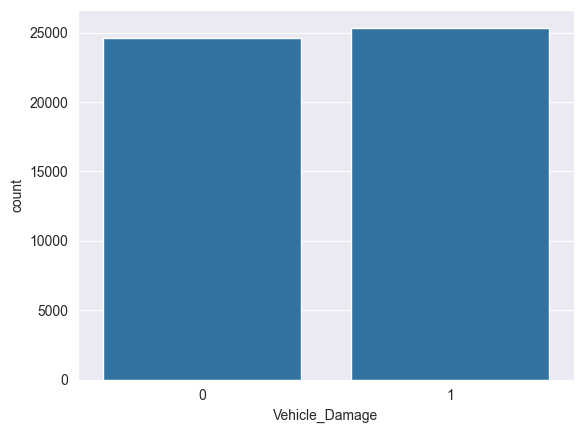

In [77]:
dl = df_features["Vehicle_Damage"].value_counts().reset_index()
sns.barplot(x=dl["Vehicle_Damage"],y=dl["count"])

<Axes: xlabel='Vehicle_Damage', ylabel='count'>

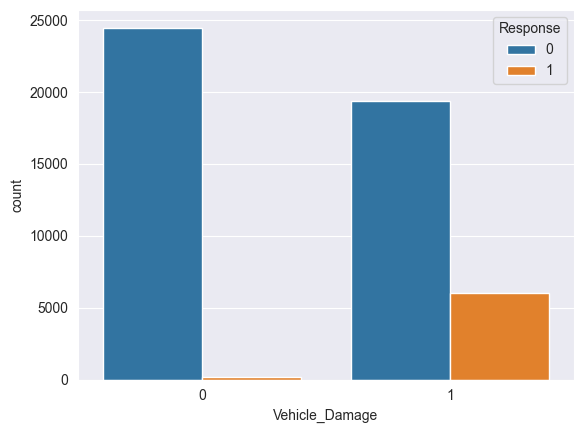

In [83]:
dl = df_3[["Vehicle_Damage","Response"]].value_counts().reset_index()
sns.barplot(x=dl["Vehicle_Damage"],y=dl["count"],hue=dl["Response"])

<Axes: xlabel='Previously_Insured', ylabel='count'>

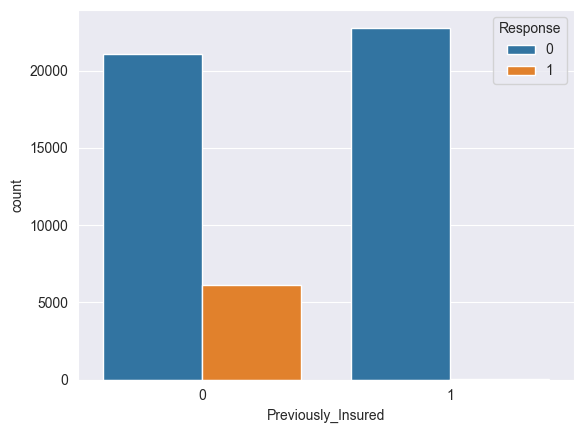

In [85]:
dl = df_3[["Previously_Insured","Response"]].value_counts().reset_index()
sns.barplot(x=dl["Previously_Insured"],y=dl["count"],hue=dl["Response"])

<Axes: xlabel='Vehicle_Age', ylabel='count'>

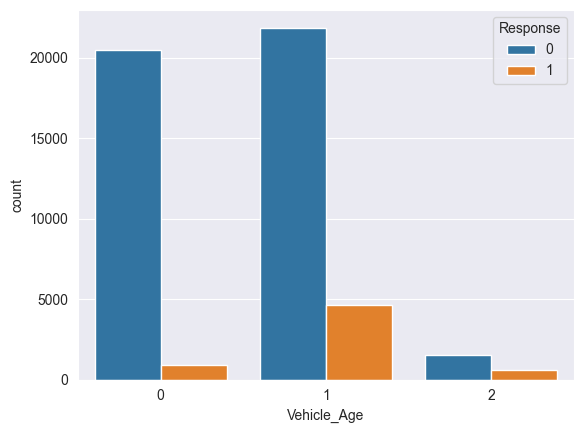

In [87]:
dl = df_3[["Vehicle_Age","Response"]].value_counts().reset_index()
sns.barplot(x=dl["Vehicle_Age"],y=dl["count"],hue=dl["Response"])

In [92]:
sm = SMOTE()
X,y = sm.fit_resample(df_features,df_labels)

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [100]:
knn = KNeighborsClassifier(n_neighbors=3)
dtc = DecisionTreeClassifier()
etc = ExtraTreeClassifier()
gnb = GaussianNB()
lda = LinearDiscriminantAnalysis()
rfc = RandomForestClassifier()

In [101]:
knn.fit(X_train,y_train)
dtc.fit(X_train,y_train)
etc.fit(X_train,y_train)
gnb.fit(X_train,y_train)
lda.fit(X_train,y_train)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [102]:
y_pred_knn = knn.predict(X_test)
y_pred_dtc = dtc.predict(X_test)
y_pred_etc = etc.predict(X_test)
y_pred_gnb = gnb.predict(X_test)
y_pred_lda = lda.predict(X_test)
y_pred_rfc = rfc.predict(X_test)

In [104]:
accuracy_knn = accuracy_score(y_pred_knn,y_test)
precision_knn = precision_score(y_pred_knn,y_test)
recall_knn = recall_score(y_pred_knn,y_test)
f1_knn = f1_score(y_pred_knn,y_test)

accuracy_dtc = accuracy_score(y_pred_dtc,y_test)
precision_dtc = precision_score(y_pred_dtc,y_test)
recall_dtc = recall_score(y_pred_dtc,y_test)
f1_dtc = f1_score(y_pred_dtc,y_test)

accuracy_etc = accuracy_score(y_pred_etc,y_test)
precision_etc = precision_score(y_pred_etc,y_test)
recall_etc = recall_score(y_pred_etc,y_test)
f1_etc = f1_score(y_pred_etc,y_test)

accuracy_gnb = accuracy_score(y_pred_gnb,y_test)
precision_gnb = precision_score(y_pred_gnb,y_test)
recall_gnb = recall_score(y_pred_gnb,y_test)
f1_gnb = f1_score(y_pred_gnb,y_test)

accuracy_lda = accuracy_score(y_pred_lda,y_test)
precision_lda = precision_score(y_pred_lda,y_test)
recall_lda = recall_score(y_pred_lda,y_test)
f1_lda = f1_score(y_pred_lda,y_test)

accuracy_rfc = accuracy_score(y_pred_rfc,y_test)
precision_rfc = precision_score(y_pred_rfc,y_test)
recall_rfc = recall_score(y_pred_rfc,y_test)
f1_rfc = f1_score(y_pred_rfc,y_test)

In [107]:
accuracy_scores = [accuracy_knn,accuracy_dtc,accuracy_etc,accuracy_gnb,accuracy_lda,accuracy_rfc]
models = ["K Neighbours Classifier","Decision Trees Classifier","Extra Trees Classifier","Gaussian Naive Bayes","Linear Discriminant Analysis","Random Forest Classifier"]
maxi = max(accuracy_scores)
ctr = 0
for i in accuracy_scores:
    if i == maxi:
        print(models[ctr])
    ctr += 1

Random Forest Classifier


In [108]:
confusion_matrix(y_test,y_pred_rfc)

array([[7577, 1180],
       [ 748, 8038]])

In [109]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      8757
           1       0.87      0.91      0.89      8786

    accuracy                           0.89     17543
   macro avg       0.89      0.89      0.89     17543
weighted avg       0.89      0.89      0.89     17543
